### Daffa Kaisha Pratama Chandra

<center>
    <h2> Airbnb for Boston with Fraud Detection <br> </h2>
</center>

<hr>

### Brief Description About The Dataset
This dataset contains in total of 21 columns. The description of each columns can be seen on the table below.
| Col. Name   | Description |
| ----------- | ----------- |
| host_response_rate      | Integer (0 - 100)       |
| host_identity_verified  | Boolean (0 - 1)        | 
| host_total_listings_count | Integer (0 - 749)        | 
| City | Integer (0 - 37)        | 
| is_location_exact | Boolean (0 - 1)       | 
| property_type | Integer (0 - 12)       | 
| room_type | Integer (0 - 2)       |
| accommodates | Integer (0 - 16)       |
| bathrooms | Integer (0 - 6)       |
| bedrooms | Integer (0 - 5)       |
| beds | Integer (0 - 16)       |
| bed_type | Integer (0 - 4)       |
| ammenities | Integer (0 - 16)       |
| price | Integer (1000 - 400k)       |
| minimum_nights | Integer (1 - 300)       |
| number_of_reviews | Integer (0 - 404)       |
| review_scores_rating | Integer (20 - 100)       |
| instant_bookable | Boolean (0 - 1)       |
| cancelation_policies | Integer (0 - 3)       |
| reviews_per_month | Float (0.01 - 19.1)       |
| fraud | Boolean (0 - 1)       |

Link to dataset: https://www.kaggle.com/datasets/hawkingcr/airbnb-for-boston-with-fraud-detection

<hr>

### Import Libraries

In [1]:
# Raw Package
import pandas as pd
import numpy as np
from scipy import stats

# Data Viz
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Prep
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

<hr>

#### Read data

In [2]:
data = pd.read_csv("dataset.csv")

# Take a look on the data
data.head()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.0,1.0,...,4,547,4000,7,34,90.0,0,2,0.38,0
1,100,1,7,2,1,8,1,2,1.0,1.0,...,4,1158,14500,3,36,91.0,0,2,0.40,0
2,100,1,7,2,1,0,0,4,1.0,1.0,...,4,2016,19500,3,47,95.0,0,2,0.54,1
3,100,1,1,2,1,0,1,2,1.0,1.0,...,4,964,6500,3,41,98.0,0,1,0.47,0
4,100,0,12,2,1,0,0,3,1.0,1.0,...,4,1794,15400,30,18,91.0,0,1,0.21,0


#### Exploratory Data Analysis

In [3]:
# Check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

The data contain 21 columns and 3585 rows.

In [4]:
# Check the missing values
data.isnull().sum()

host_response_rate           0
host_identity_verified       0
host_total_listings_count    0
city                         0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
minimum_nights               0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
reviews_per_month            0
fraud                        0
dtype: int64

No missing values on the dataset. <br> <br>
Check the data distribution.

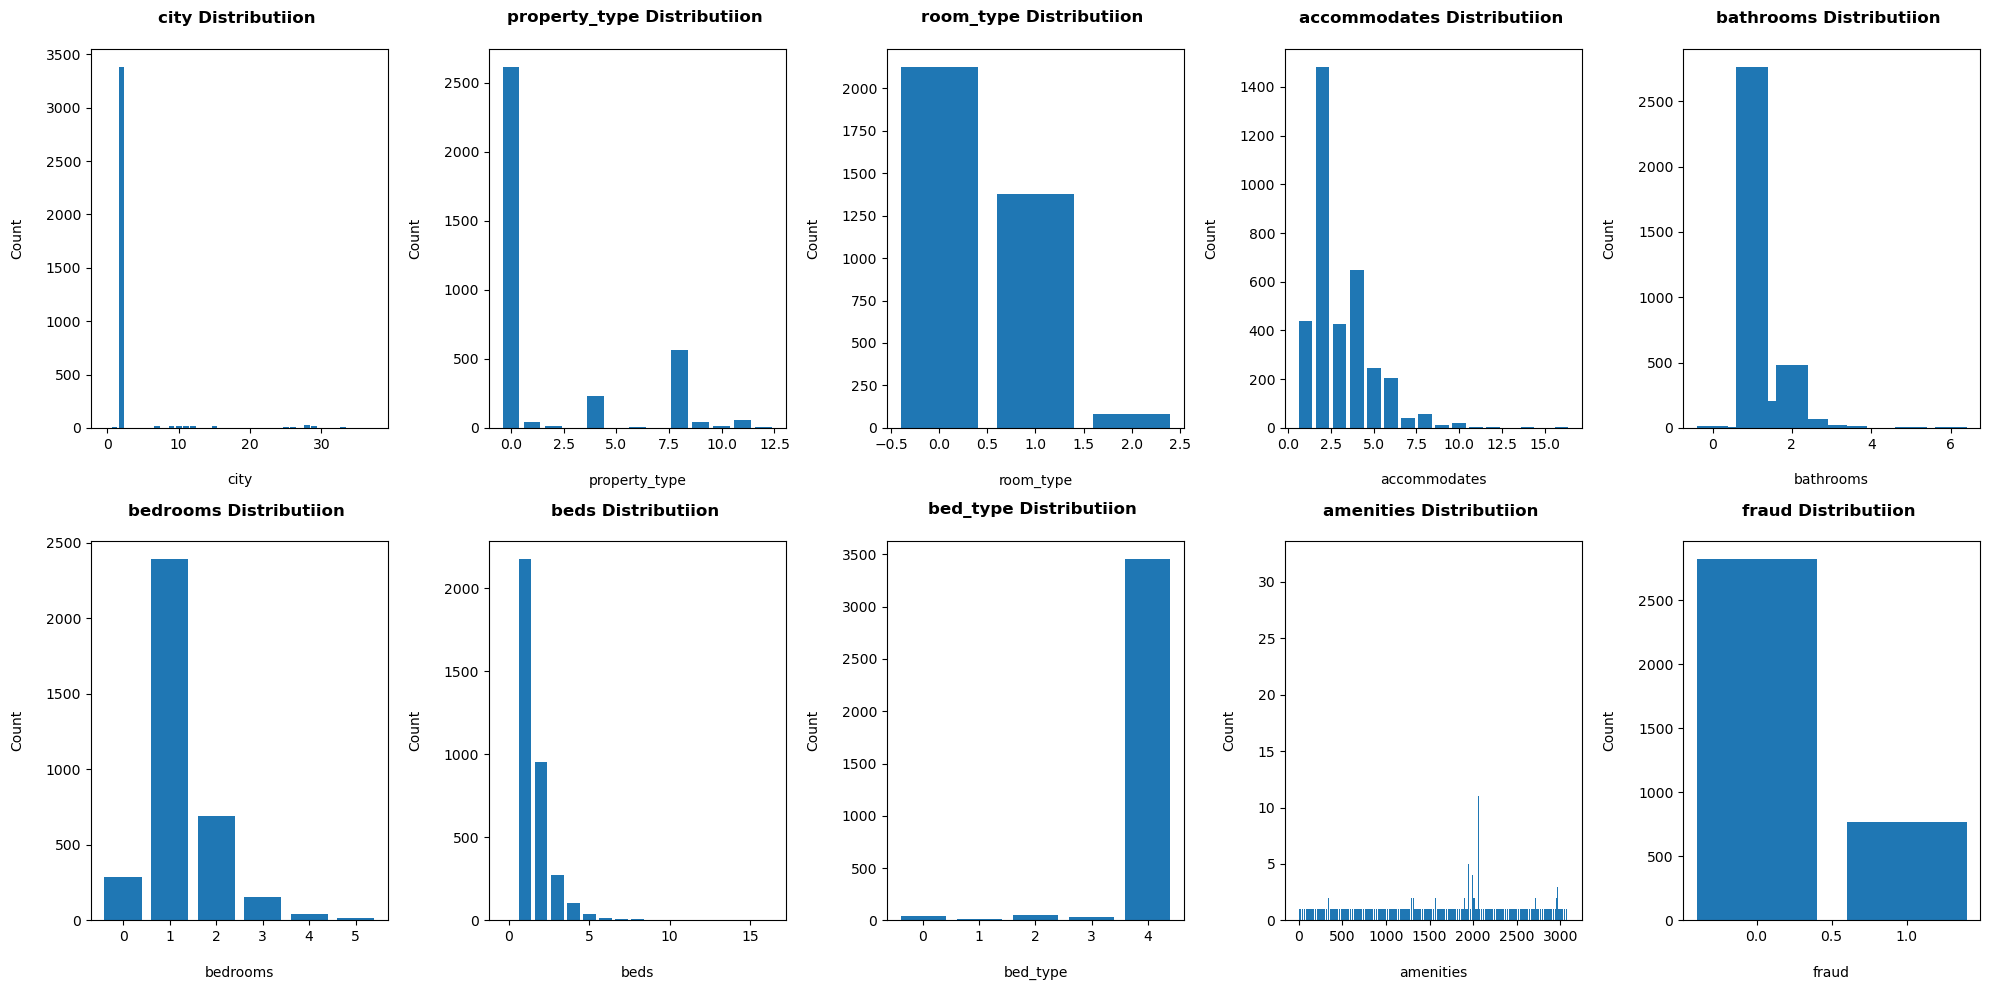

In [5]:
# Distribution Plot
cols = ['city', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'fraud']

fig, axes = plt.subplots(2, 5, figsize=(20,10))
axes = axes.flatten()

for i, columns in enumerate(cols):
    ax = axes[i]
    # count
    counts = data[columns].value_counts()
    # plot
    ax.bar(counts.index, counts.values)
    ax.set_title(f"{columns} Distributiion \n", weight='bold')
    ax.set_xlabel(f"\n{columns}")
    ax.set_ylabel("Count\n")
    
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

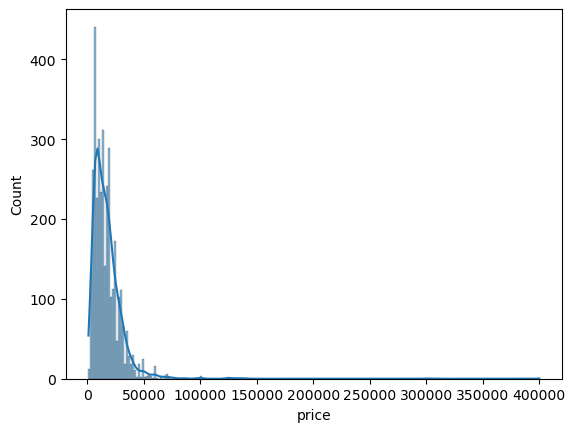

In [6]:
# Price distribution
sns.histplot(data=data, x='price', kde=True)

What do we get from EDA:
1. The data contain 21 columns and 3585 rows.
2. No missing values.
3. The data is imbalance.
4. There are many outliers.

<hr>

### Data Preparation

#### Fixing Imbalance Data

In [7]:
# Fix imbalance data
from imblearn.over_sampling import SMOTE

# Selecting  Feature
X = data.drop(columns='fraud')  # Ganti dengan matriks fitur Anda
y = data[['fraud']]  # Ganti dengan label/target Anda

# Instance SMOTE
smote = SMOTE(sampling_strategy=0.8, random_state=42)

# Oversampling using  SMOTE
X_oversampled, y_oversampled = smote.fit_resample(X, y)

In [8]:
# Save the result to new dataset
new_df = pd.concat([X_oversampled, y_oversampled], axis=1)
new_df

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.000000,1.000000,...,4,547,4000,7,34,90.000000,0,2,0.380000,0
1,100,1,7,2,1,8,1,2,1.000000,1.000000,...,4,1158,14500,3,36,91.000000,0,2,0.400000,0
2,100,1,7,2,1,0,0,4,1.000000,1.000000,...,4,2016,19500,3,47,95.000000,0,2,0.540000,1
3,100,1,1,2,1,0,1,2,1.000000,1.000000,...,4,964,6500,3,41,98.000000,0,1,0.470000,0
4,100,0,12,2,1,0,0,3,1.000000,1.000000,...,4,1794,15400,30,18,91.000000,0,1,0.210000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,98,1,1,2,1,0,0,4,1.049469,1.148407,...,4,1200,17500,3,70,97.752655,0,2,2.301557,1
5068,95,1,1,2,0,0,0,2,1.000000,0.399349,...,4,2674,12659,1,23,92.996745,0,0,1.969902,1
5069,100,1,6,7,1,0,0,6,1.743594,2.743594,...,4,730,32797,1,55,90.025624,0,1,3.856909,1
5070,95,1,7,2,1,0,0,3,1.000000,1.493734,...,4,1037,18697,2,37,93.962404,0,2,1.979298,1


In [9]:
# Calculate the percentage of 1 and 0 values of fraud data
ones_percentage = np.count_nonzero(y_oversampled == 1) / y_oversampled.size * 100
zeros_percentage = np.count_nonzero(y_oversampled == 0) / y_oversampled.size * 100

print(f"The percentage of 1 values is: {ones_percentage:.2f}%")
print(f"The percentage of 0 values is: {zeros_percentage:.2f}%")

The percentage of 1 values is: 44.44%
The percentage of 0 values is: 55.56%


#### Feature Selection

In [10]:
# Selecting price data below 50.000
data = new_df[new_df['price'] < 50000]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4962 entries, 0 to 5071
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         4962 non-null   int64  
 1   host_identity_verified     4962 non-null   int64  
 2   host_total_listings_count  4962 non-null   int64  
 3   city                       4962 non-null   int64  
 4   is_location_exact          4962 non-null   int64  
 5   property_type              4962 non-null   int64  
 6   room_type                  4962 non-null   int64  
 7   accommodates               4962 non-null   int64  
 8   bathrooms                  4962 non-null   float64
 9   bedrooms                   4962 non-null   float64
 10  beds                       4962 non-null   float64
 11  bed_type                   4962 non-null   int64  
 12  amenities                  4962 non-null   int64  
 13  price                      4962 non-null   int64

<AxesSubplot:>

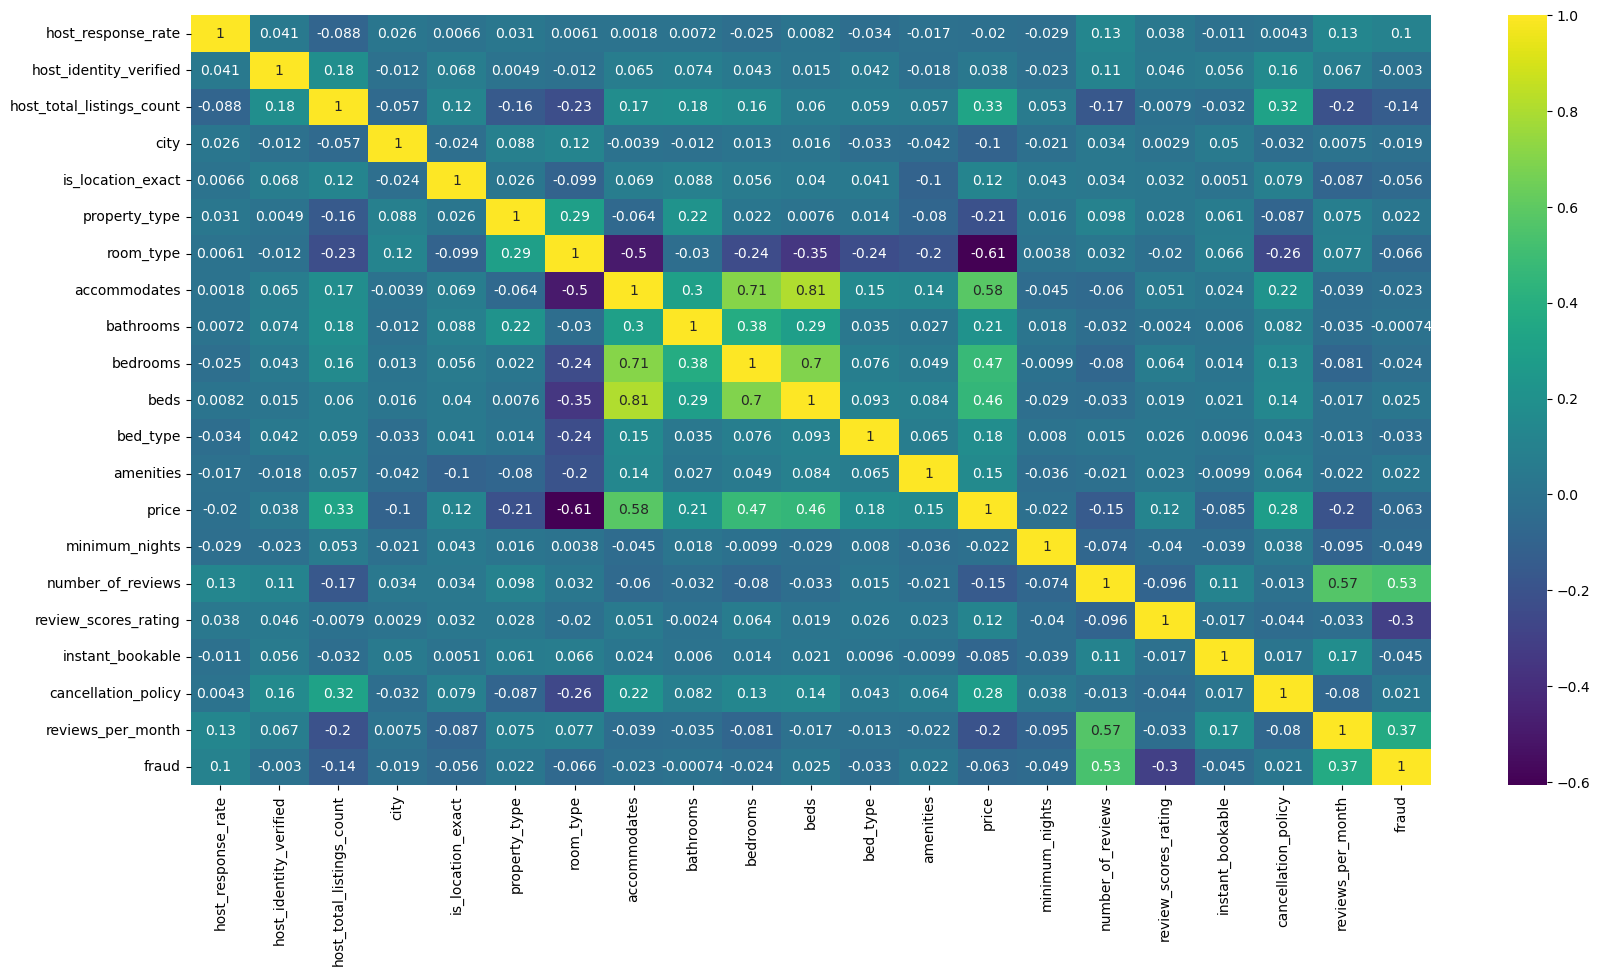

In [11]:
corr = data.corr()

plt.figure(figsize=(20,10))

sns.heatmap(corr, cmap='viridis', annot=True)

In [12]:
X = data[['accommodates', 'beds', 'bathrooms', 'bedrooms', 'reviews_per_month', 'number_of_reviews', 'price', 'room_type', 'property_type']]
y = data['fraud']

In [13]:
# Normalization
mms = StandardScaler()
mms.fit_transform(X)

array([[-1.15189817, -0.62691718, -0.44855335, ..., -1.31349227,
         1.13859421, -0.58433836],
       [-0.54891065, -0.62691718, -0.44855335, ..., -0.13311628,
         1.13859421,  1.94658315],
       [ 0.6570644 ,  0.46011842, -0.44855335, ...,  0.42896752,
        -0.77461421, -0.58433836],
       ...,
       [ 1.86303944,  2.88505761,  1.21012528, ...,  1.92377318,
        -0.77461421, -0.58433836],
       [ 0.05407687,  0.44649556, -0.44855335, ...,  0.33869686,
        -0.77461421, -0.58433836],
       [ 1.26005192,  0.85786037, -0.44855335, ...,  1.44071836,
        -0.77461421, -0.58433836]])

In [14]:
# PCA
pca = PCA()

In [15]:
dt = DecisionTreeClassifier()

In [16]:
# Pipeline for GridsearchCV
pipe = Pipeline(steps=[('std_slc', mms),
                       ('pca', pca),
                       ('dec_tree', dt)])

In [17]:
# n_components
n_components = list(range(1,X.shape[1]+1,1))

In [18]:
# Param
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [19]:
# Dict for Gridsearch
parameters = dict(pca__n_components=n_components,
                dec_tree__criterion=criterion,
                dec_tree__max_depth=max_depth)

#### Gridsearch

In [20]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [21]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 8
Best Number Of Components: 4

DecisionTreeClassifier(max_depth=8)


#### Data Splitting

In [22]:
# Apply PCA with 2 components
pca = PCA(n_components=4)
pca.fit_transform(X)

# Split data with 8:2 ratio. 80% train set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<hr>

### Modeling
#### Decision Tree with Hyperparameter Tuning

In [23]:
# Modelling according to best param
dtc = DecisionTreeClassifier(criterion='gini', max_depth=8)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

[Text(0.4874131944444444, 0.9444444444444444, 'X[5] <= 11.5\ngini = 0.493\nsamples = 3969\nvalue = [2221, 1748]'),
 Text(0.20167824074074073, 0.8333333333333334, 'X[5] <= 3.5\ngini = 0.193\nsamples = 1898\nvalue = [1693, 205]'),
 Text(0.08015046296296297, 0.7222222222222222, 'X[5] <= 1.5\ngini = 0.043\nsamples = 1236\nvalue = [1209, 27]'),
 Text(0.03935185185185185, 0.6111111111111112, 'X[4] <= 0.085\ngini = 0.009\nsamples = 892\nvalue = [888, 4]'),
 Text(0.023148148148148147, 0.5, 'X[7] <= 1.5\ngini = 0.069\nsamples = 56\nvalue = [54, 2]'),
 Text(0.013888888888888888, 0.3888888888888889, 'X[0] <= 1.5\ngini = 0.036\nsamples = 54\nvalue = [53, 1]'),
 Text(0.009259259259259259, 0.2777777777777778, 'X[7] <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.004629629629629629, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.013888888888888888, 0.16666666666666666, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.018518518518518517, 0.2777777777777778, 'g

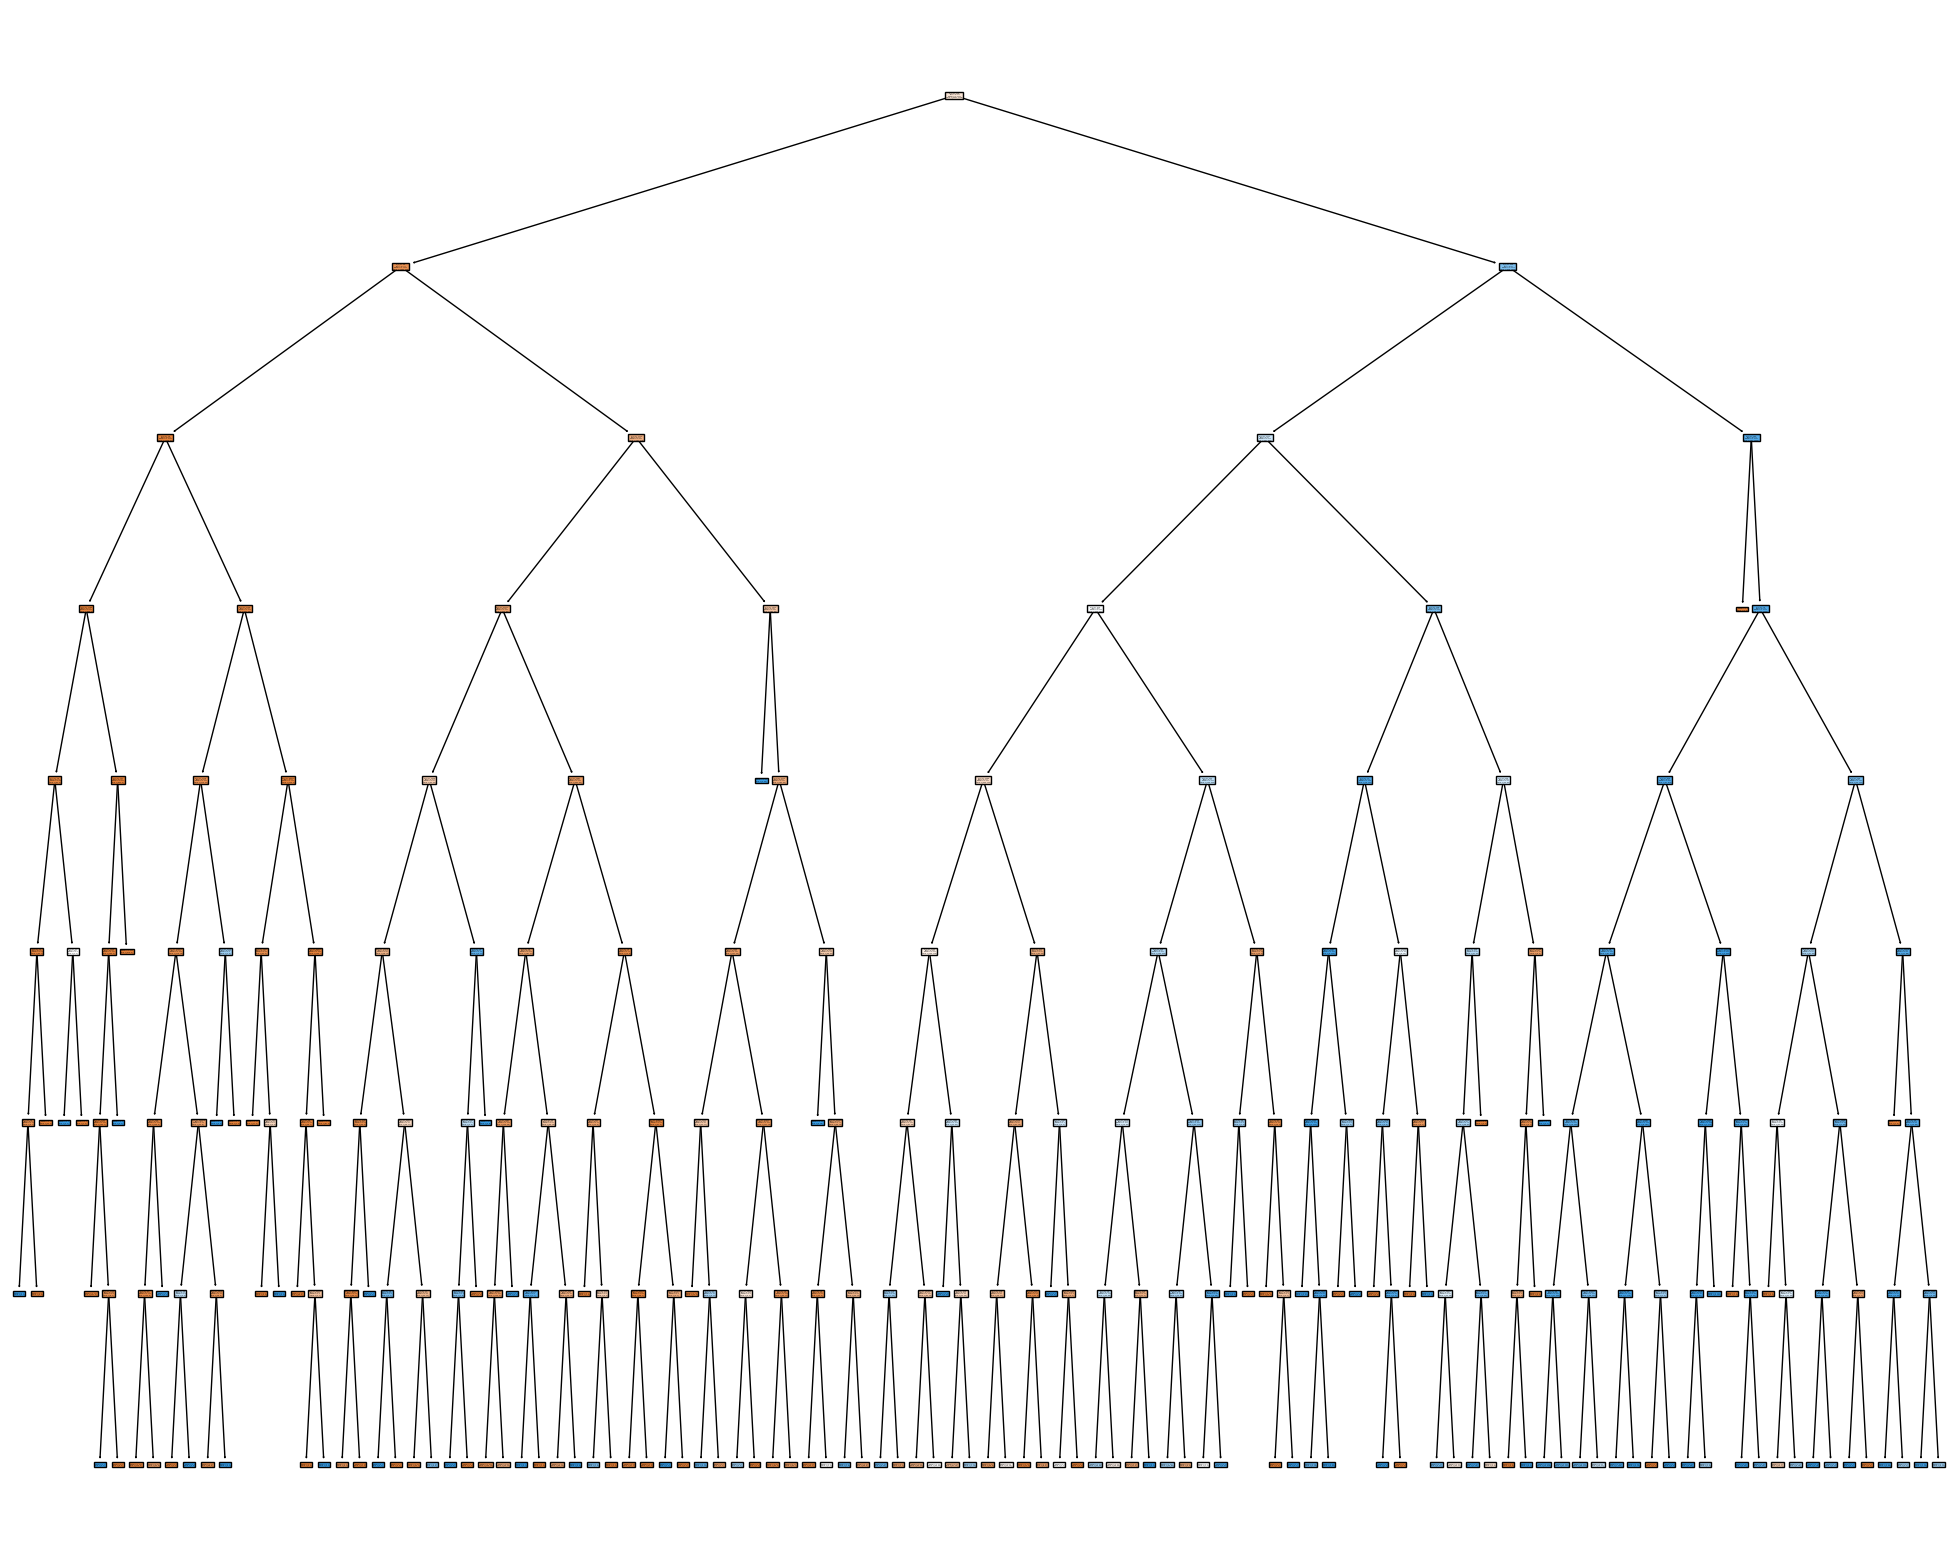

In [24]:
# Plot the tree
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtc,filled=True)

In [25]:
# Check the accuracy of decision tree train dan test set
print("Decision Tree Classifier Train set accuracy: {}".format(np.round(dtc.score(X_train, y_train), 3)))
print("Decision Tree Classifier Test set accuracy: {}".format(np.round(dtc.score(X_test, y_test), 3)))

Decision Tree Classifier Train set accuracy: 0.891
Decision Tree Classifier Test set accuracy: 0.819


In [26]:
dtc_predict = dtc.predict(X_test)

print(classification_report(y_test, dtc_predict))
print("Model accuracy: {}".format(np.round(accuracy_score(y_test, dtc_predict), 2)))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       520
           1       0.83      0.78      0.80       473

    accuracy                           0.82       993
   macro avg       0.82      0.82      0.82       993
weighted avg       0.82      0.82      0.82       993

Model accuracy: 0.82


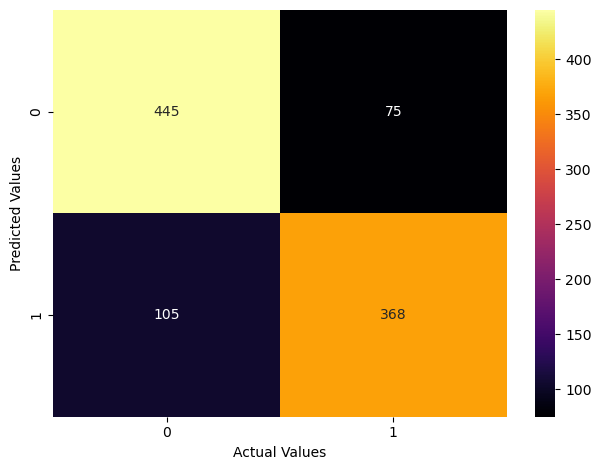

In [27]:
# Confusion Matrix
cnf_mtrx = confusion_matrix(y_test, dtc_predict)
sns.heatmap(cnf_mtrx, cmap='inferno', annot=True, fmt='g')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.tight_layout()

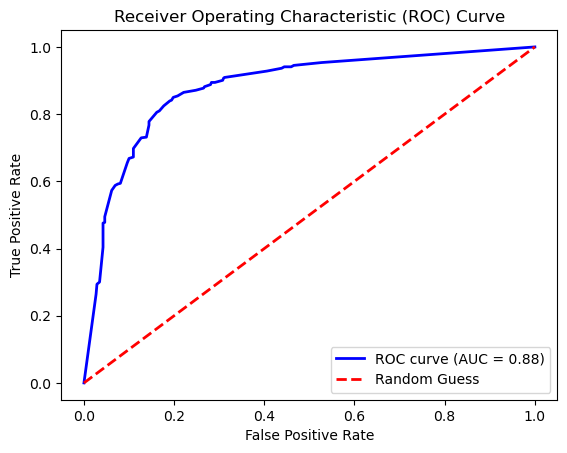

In [28]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
y_scores = dtc.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Random Forest Classifier

In [29]:
rfc = RandomForestClassifier(criterion='gini', max_depth=4)
rfc.fit(X_train, y_train)

# Predict
rfc_pred = rfc.predict(X_test)

[Text(0.5, 0.9, 'X[5] <= 11.5\ngini = 0.491\nsamples = 2519\nvalue = [2256, 1713]'),
 Text(0.25, 0.7, 'X[1] <= 2.012\ngini = 0.187\nsamples = 1215\nvalue = [1742, 203]'),
 Text(0.125, 0.5, 'X[5] <= 3.5\ngini = 0.174\nsamples = 1074\nvalue = [1567, 167]'),
 Text(0.0625, 0.3, 'X[4] <= 0.759\ngini = 0.045\nsamples = 715\nvalue = [1133, 27]'),
 Text(0.03125, 0.1, 'gini = 0.097\nsamples = 246\nvalue = [370, 20]'),
 Text(0.09375, 0.1, 'gini = 0.018\nsamples = 469\nvalue = [763, 7]'),
 Text(0.1875, 0.3, 'X[1] <= 1.016\ngini = 0.369\nsamples = 359\nvalue = [434, 140]'),
 Text(0.15625, 0.1, 'gini = 0.323\nsamples = 245\nvalue = [307, 78]'),
 Text(0.21875, 0.1, 'gini = 0.441\nsamples = 114\nvalue = [127, 62]'),
 Text(0.375, 0.5, 'X[5] <= 4.5\ngini = 0.283\nsamples = 141\nvalue = [175, 36]'),
 Text(0.3125, 0.3, 'X[8] <= 4.5\ngini = 0.042\nsamples = 88\nvalue = [137, 3]'),
 Text(0.28125, 0.1, 'gini = 0.0\nsamples = 63\nvalue = [101, 0]'),
 Text(0.34375, 0.1, 'gini = 0.142\nsamples = 25\nvalue = [3

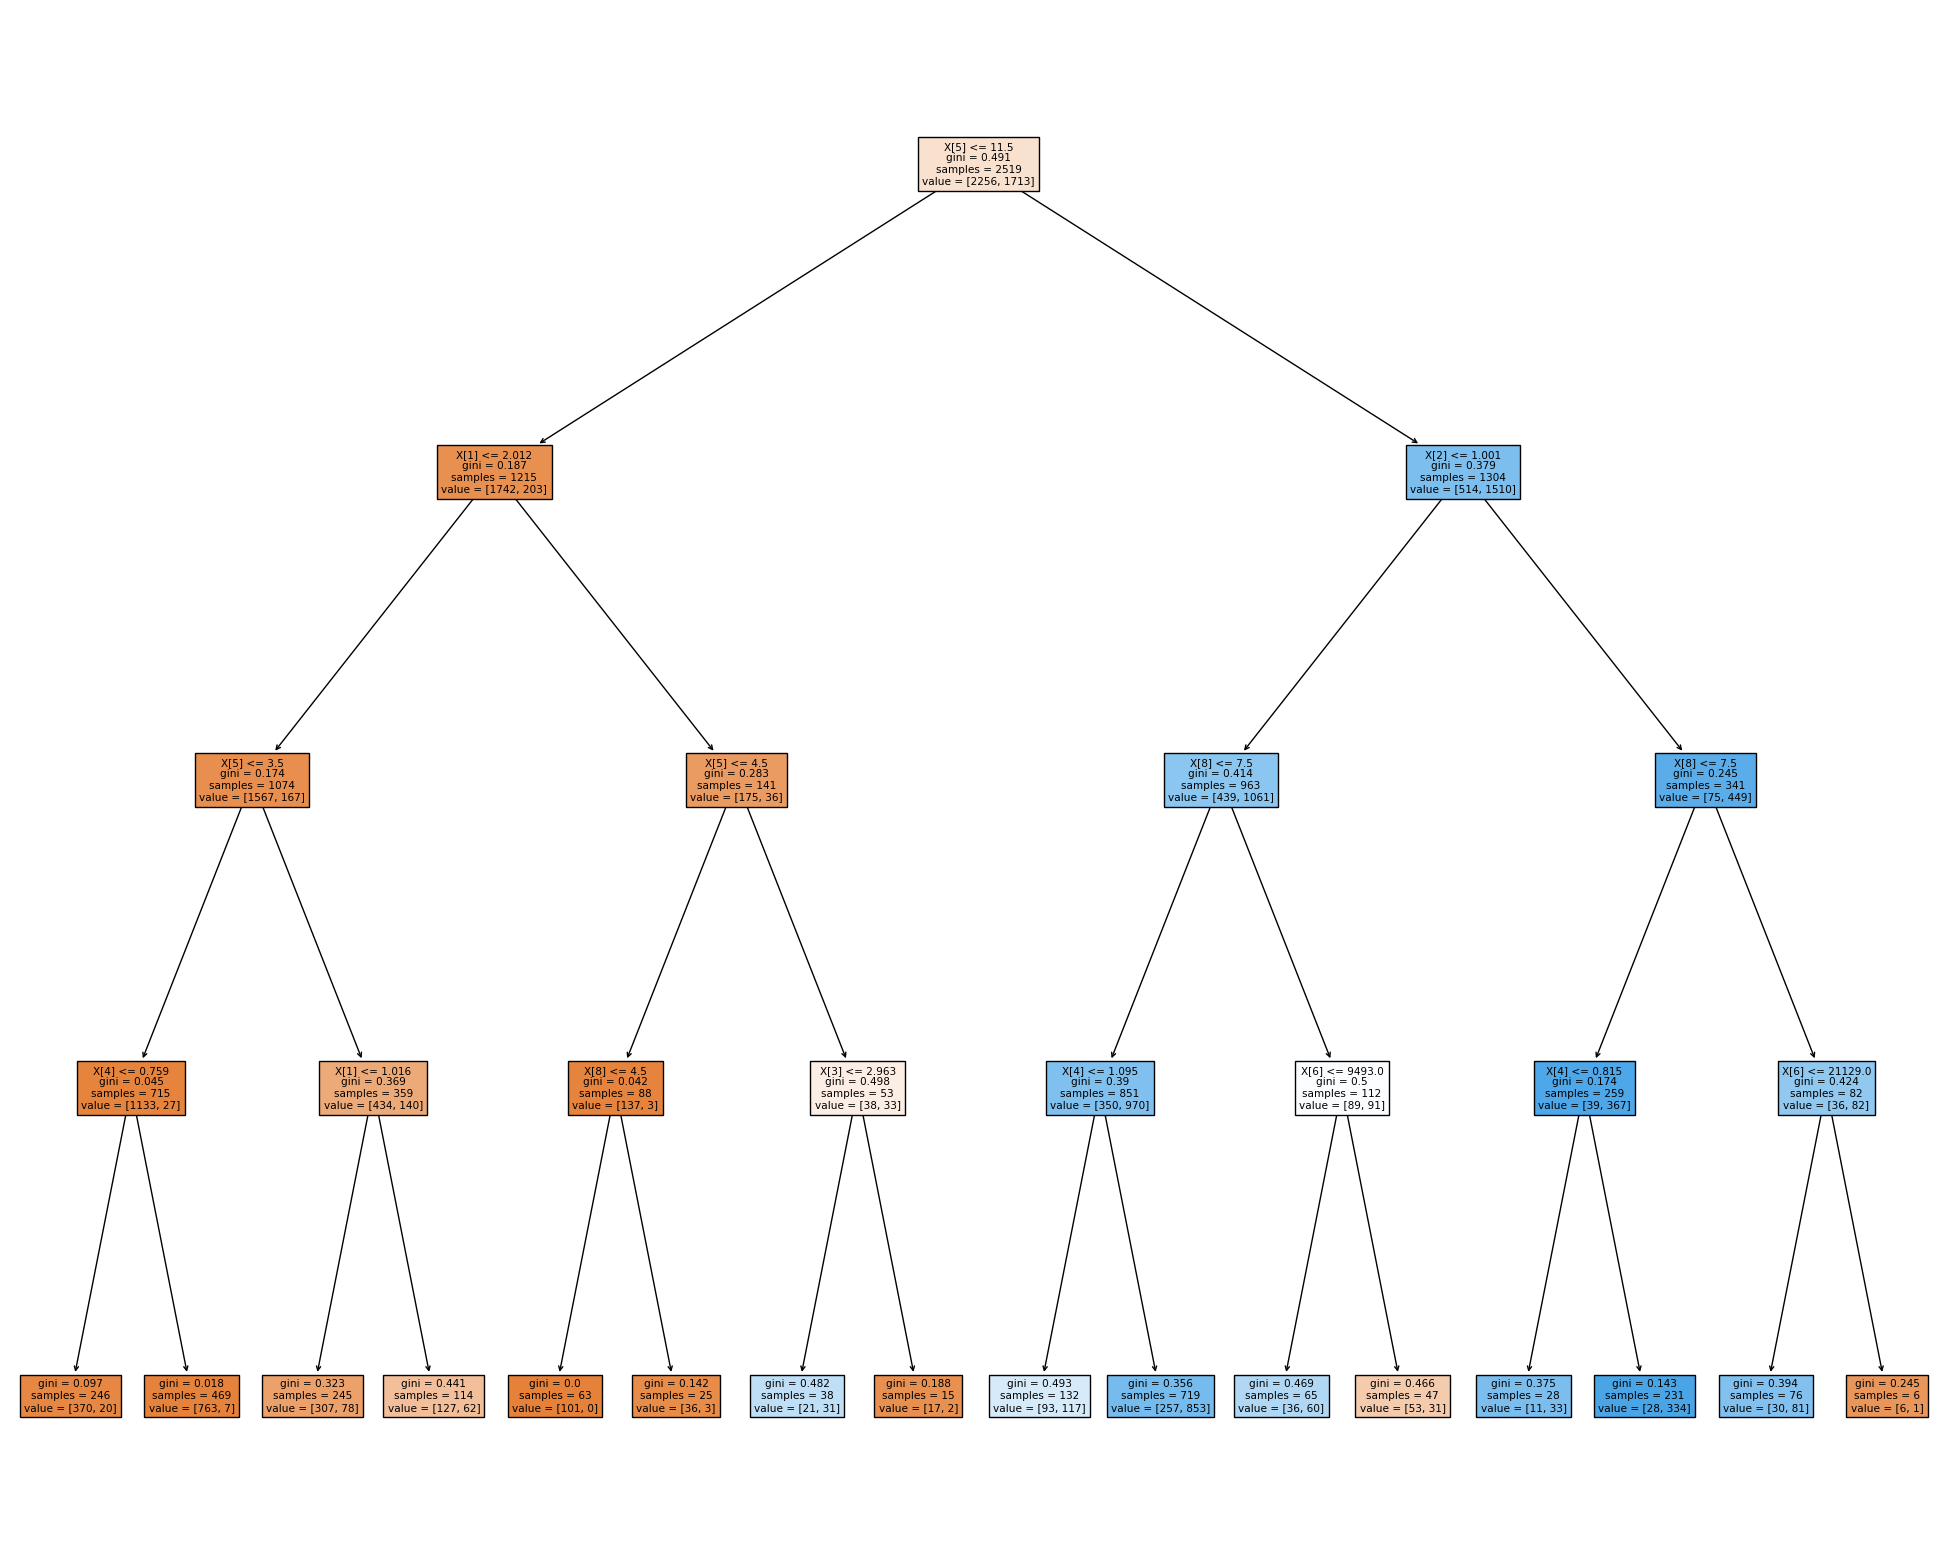

In [30]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rfc.estimators_[0],filled = True)

In [31]:
# Check the accuracy of Random Forest train dan test set
print("Random Forest Classifier Train set accuracy: {}".format(np.round(rfc.score(X_train, y_train), 3)))
print("Random Forest Classifier Test set accuracy: {}".format(np.round(rfc.score(X_test, y_test), 3)))

Random Forest Classifier Train set accuracy: 0.843
Random Forest Classifier Test set accuracy: 0.829


In [32]:
print(classification_report(y_test, rfc_pred))
print("Model accuracy: {}".format(np.round(accuracy_score(y_test, rfc_pred), 2)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       520
           1       0.82      0.81      0.82       473

    accuracy                           0.83       993
   macro avg       0.83      0.83      0.83       993
weighted avg       0.83      0.83      0.83       993

Model accuracy: 0.83


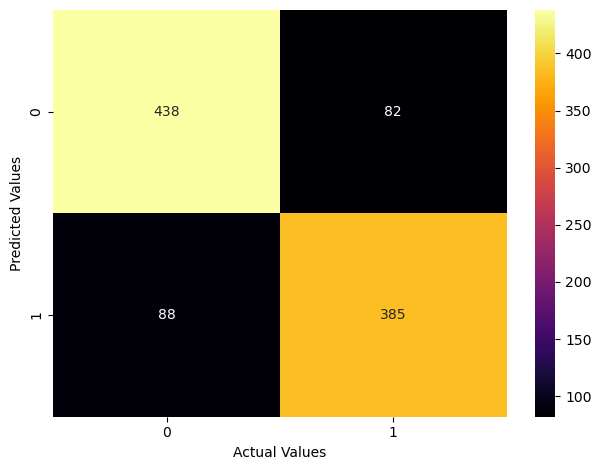

In [33]:
# Confusion Matrix
cnf_mtrx = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cnf_mtrx, cmap='inferno', annot=True, fmt='g')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.tight_layout()

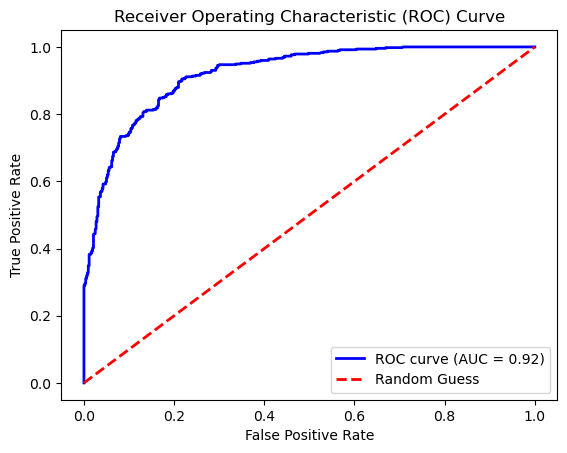

In [34]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
y_scores = rfc.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Gradient Boosting Classifier

In [35]:
gbc = GradientBoostingClassifier(max_features=4, max_depth=8, learning_rate=0.5)
gbc.fit(X_train, y_train)

# Prediction
gbc_pred = gbc.predict(X_test)

In [36]:
# Check the accuracy of decision tree train dan test set
print("GradientBoosting Classifier Train set accuracy: {}".format(np.round(gbc.score(X_train, y_train), 3)))
print("GradientBoosting Classifier Test set accuracy: {}".format(np.round(gbc.score(X_test, y_test), 3)))

GradientBoosting Classifier Train set accuracy: 0.999
GradientBoosting Classifier Test set accuracy: 0.863


In [37]:
print(classification_report(y_test, gbc_pred))
print("Model accuracy: {}".format(np.round(accuracy_score(y_test, gbc_pred), 2)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       520
           1       0.88      0.83      0.85       473

    accuracy                           0.86       993
   macro avg       0.86      0.86      0.86       993
weighted avg       0.86      0.86      0.86       993

Model accuracy: 0.86


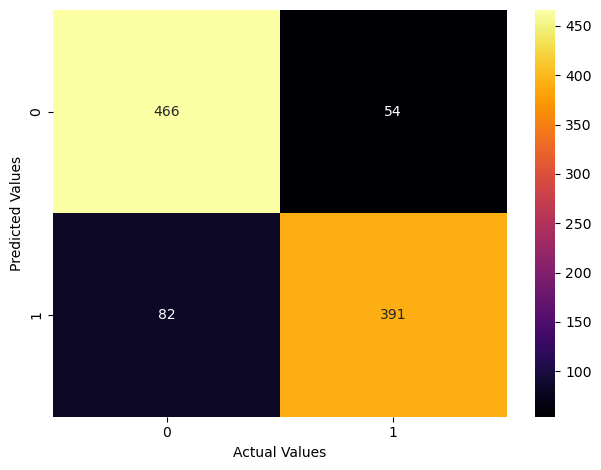

In [38]:
# Confusion Matrix
cnf_mtrx = confusion_matrix(y_test, gbc_pred)
sns.heatmap(cnf_mtrx, cmap='inferno', annot=True, fmt='g')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.tight_layout()

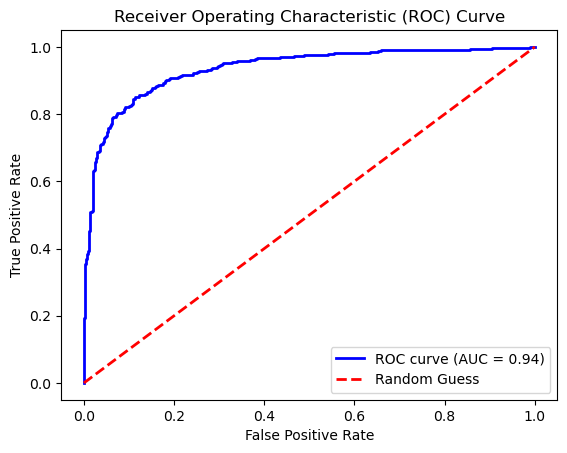

In [39]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1)
y_scores = gbc.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Conclussion

Among the 3 models that have been made, the Gradient Boosting CLassifier gave the highest accuracy score in about 86%, followed by Random Forest Classifier in about 83%, and Decision Tree Classifier in about 82%.

From the EDA process, we can find that:
1. Most of the Air BnB facilities in Boston have 1 bathrooms, 1 bedrooms, and 2 beds.
2. Most of the transaction occured is identified as not fraud.